In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df["Category"]

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

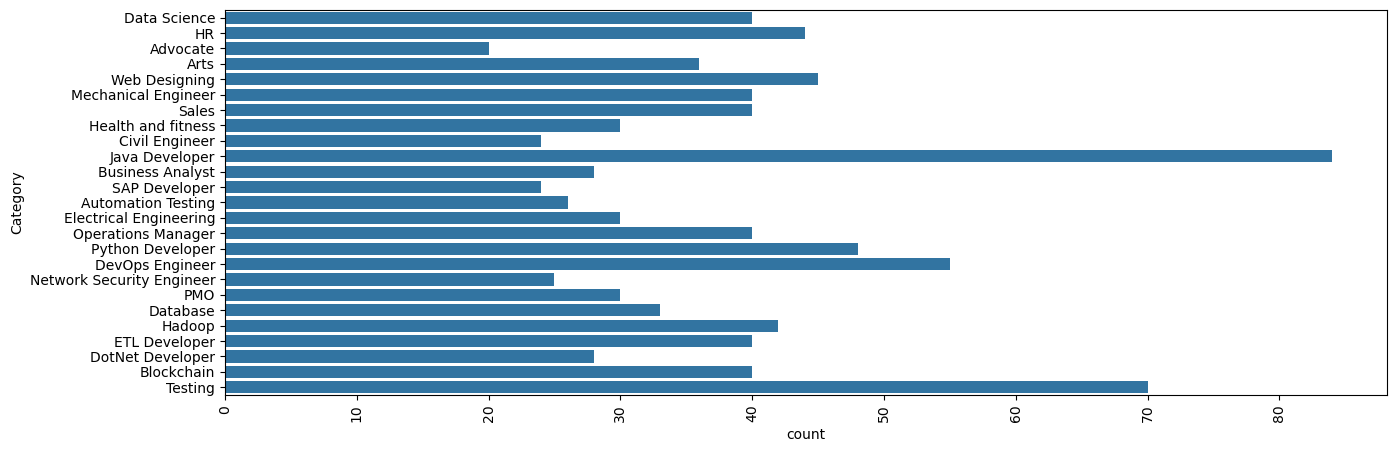

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation = 90)
plt.show()

In [6]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

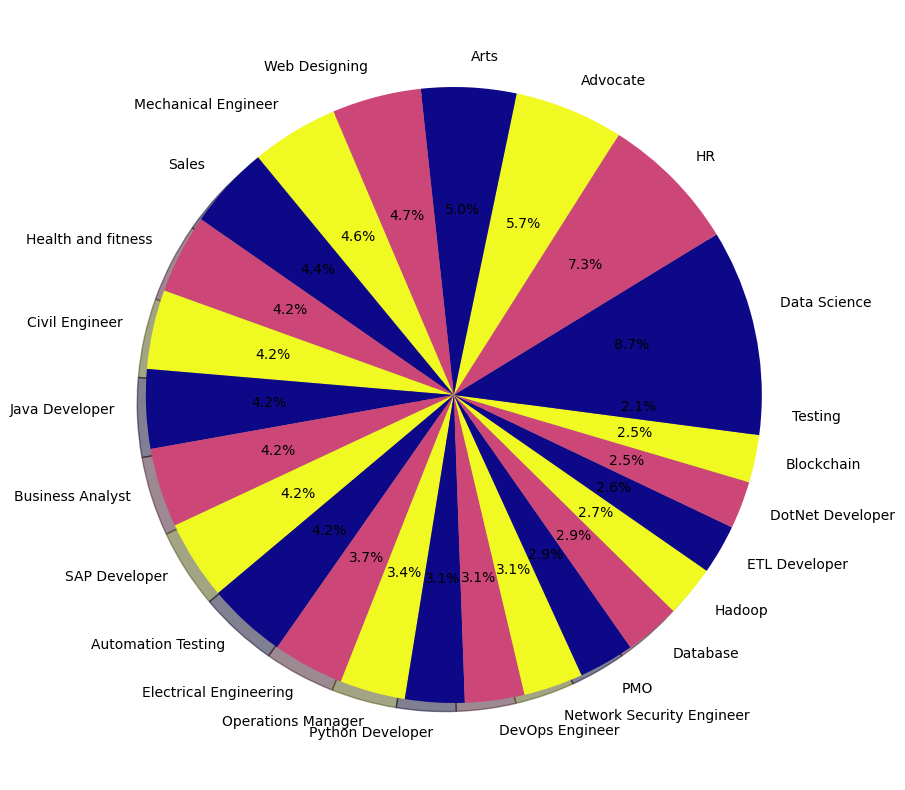

In [7]:
counts = df['Category'].value_counts()
labels = df['Category'].unique() 
plt.figure(figsize=(15,10))

plt.pie(counts, labels= labels,autopct='%1.1f%%',shadow=True, colors= plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

## Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning Data
##### 1 Urls,
##### 2 Hashtags,
##### 3 mentions,
##### 4 special letters,
##### 5 punctuations:

In [12]:
import re 
def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s',' ',txt)
    cleanTxt = re.sub('RT|cc',' ',cleanTxt)
    cleanTxt = re.sub('@\S+',' ',cleanTxt)
    cleanTxt = re.sub('#\S+',' ',cleanTxt)
    cleanTxt = re.sub('[%s]'% re.escape("""!"#&%$'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ' ,cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt = re.sub('\s+',' ',cleanTxt)
    return cleanTxt

In [13]:
cleanResume("my #### @%Q%WR&YU website link is like this http://nikunj.com niku@gmail.com")

'my website link is like this niku '

In [14]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [15]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [16]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


## Words into categorical values 

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(df["Category"])
df['Category'] = le.transform(df['Category'])

In [20]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [21]:
#['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#         'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

## Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext = tfidf.transform(df['Resume'])

In [24]:
requiredtext

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

## Splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train , X_test, y_train, y_test = train_test_split(requiredtext, df['Category'], test_size=0.2,random_state=42)

In [28]:
 X_train.shape

(769, 7351)

## Model Training

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf =  OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(ypred)
print(accuracy_score(y_test,ypred)*100 ,"%")

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
98.44559585492227 %


## Prediction System 


In [32]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [59]:
myResume = '''Rohan Sharma is a Machine Learning Engineer with over 3 years of experience in building and deploying scalable ML solutions. He has strong expertise in Python, Java, SQL, and R, along with frameworks such as TensorFlow, PyTorch, Scikit-learn, Pandas, NumPy, and OpenCV. His core skills include supervised and unsupervised learning, deep learning with CNN, RNN, LSTM, and transformers, natural language processing, computer vision, recommendation systems, and model optimization. He also has hands-on experience with cloud platforms like AWS SageMaker, Google Cloud AI Platform, and Big Data tools like Apache Spark and Hadoop. Rohan has worked at ABC Technologies as a Machine Learning Engineer, where he built and deployed an NLP-based chatbot reducing customer query resolution time by 40% and developed a recommendation engine that improved engagement by 25%. Earlier, as a Data Scientist at XYZ Analytics, he created predictive models in healthcare with 85% accuracy and implemented computer vision models for defect detection in manufacturing. His projects include Fake News Detection using LSTM, Real-time Object Detection with YOLOv5, and Stock Price Prediction using ARIMA and LSTM. Rohan holds a B.Tech in Computer Science and Engineering from KR Mangalam University (2016–2020) and is certified in AWS Machine Learning Specialty, TensorFlow Developer, and Advanced SQL for Data Science.'''

In [67]:
import pickle 

#load the trained classifier 
clf = pickle.load(open('clf.pkl', 'rb'))

#Clean the input resume 
cleaned_resume = cleanResume(myResume)

#Transform the cleaned resume using the trained TfidVectorizer
input_features = tfidf.transform([cleaned_resume])

#Make the prediction using the loaded classifier 
prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Engineer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DOTNet Developer",
    2: "Automation Testing",
    17: "Network Securiy Engineer",
    21: "SAP Engineer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Prediction Category:", category_name)
print(prediction_id)
    
    
    

Prediction Category: Data Science
6
